# Credit Account Default Status and Characteristics

Credit history matters a lot when individuals want to take out loans ... say more about this later

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# checking missing values
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MODE             2675
COMMONAREA_AVG              2675
COMMONAREA_MEDI             2675
NONLIVINGAPARTMENTS_MODE    2660
NONLIVINGAPARTMENTS_AVG     2660
                            ... 
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_ANNUITY                    0
SK_ID_CURR                     0
Length: 122, dtype: int64

In [ ]:
# drop columns with more then 50% missing
df.isnull().sum().sort_values(ascending=False)[0]

In [6]:
# separating df into categorical and numerical to help with further analysis

# categorical dataframe

categorical_df = df.select_dtypes(exclude=np.number)

# numerical dataframe

numerical_df = df.select_dtypes(include=np.number)

In [62]:
# Finding the unique values for columns with categorical variables
unique_df = categorical_df.nunique().reset_index()
unique_df.columns = ['Column','Number of Unique Values']

# extract unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: df[x].unique())
unique_df.sort_values(by='Number of Unique Values')

,Column,Number of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
1,CODE_GENDER,2,"[M, F]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific..."
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg ..."
5,NAME_INCOME_TYPE,5,"[Working, State servant, Commercial associate,..."
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,5,"[Single / not married, Married, Civil marriage..."


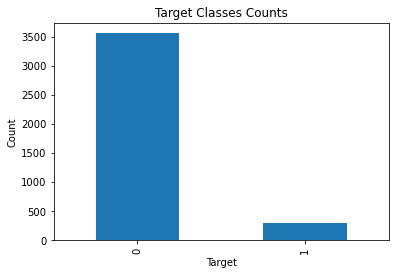

In [6]:
# visualizing TARGET counts
df['TARGET'].value_counts().plot(kind='bar');
plt.title('Target Classes Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.savefig('output/target_counts.png')

In [67]:
# correlation matrix 
corr = numerical_df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# plt.savefig('output/correlation_matrix.png') # not sure how to save this figure

/tmp/ipykernel_1039/2866234702.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/srv/conda/envs/notebook/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


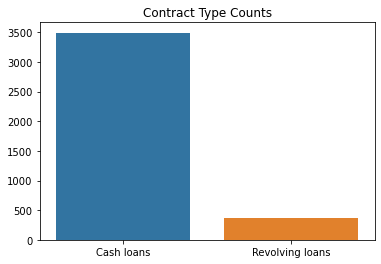

In [43]:
# count of cash loans vs revolving loans
# Revolving credit allows a borrower to spend the money they have borrowed, repay it, 
# and borrow again as needed

ax = sns.barplot(x=['Cash loans', 'Revolving loans'], y=[sum(df['NAME_CONTRACT_TYPE']=='Cash loans'), sum(df['NAME_CONTRACT_TYPE']=='Revolving loans')])
plt.title('Contract Type Counts')
plt.savefig('output/name_contract_type_counts.png')

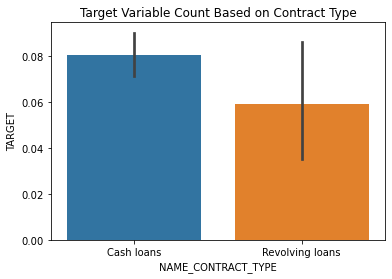

In [39]:
# how target variable varies depending on contract type - does this make sense? 

ax = sns.barplot(x="NAME_CONTRACT_TYPE", y="TARGET", data=df)
plt.title('Target Variable Count Based on Contract Type')
plt.savefig('output/target_contract_type_counts.png')

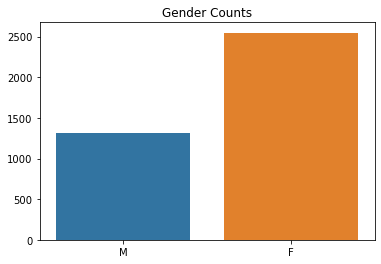

In [45]:
# Gender balance

ax = sns.barplot(x=['M', 'F'], y=[sum(df['CODE_GENDER']=='M'), sum(df['CODE_GENDER']=='F')])
plt.title('Gender Counts')
plt.savefig('output/gender_counts.png')

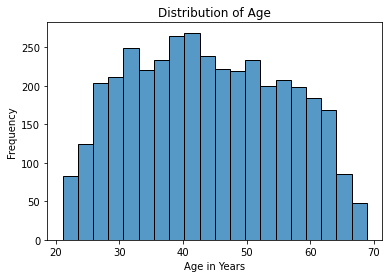

In [56]:
df['YEARS_BIRTH'] = -df['DAYS_BIRTH']/365.25

# plot the distribution of ages 

sns.histplot(data=df, x="YEARS_BIRTH")
plt.title('Distribution of Age')
plt.xlabel('Age in Years')
plt.ylabel('Freq')
plt.savefig('output/age_counts.png')

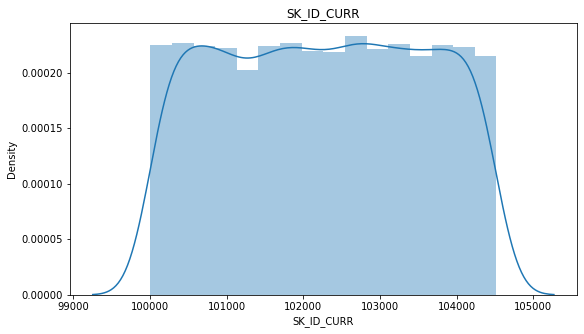

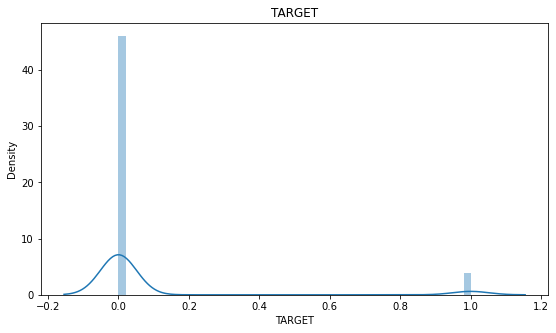

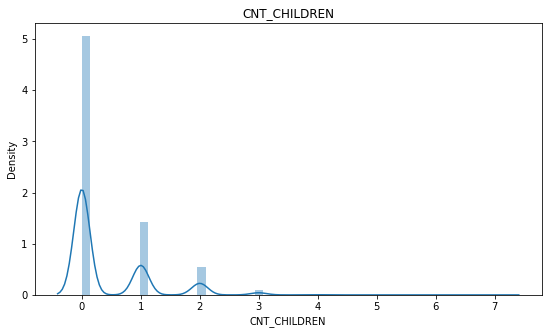

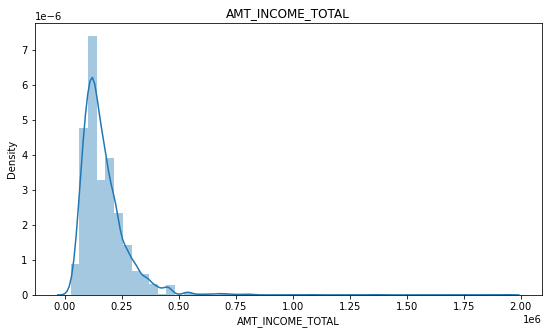

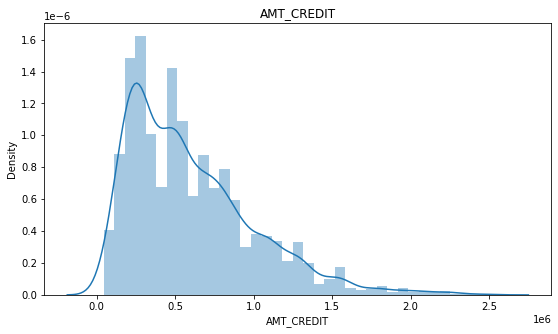

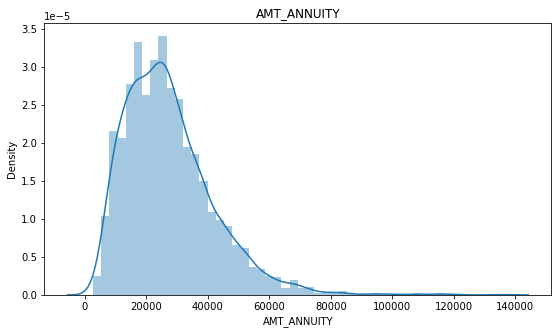

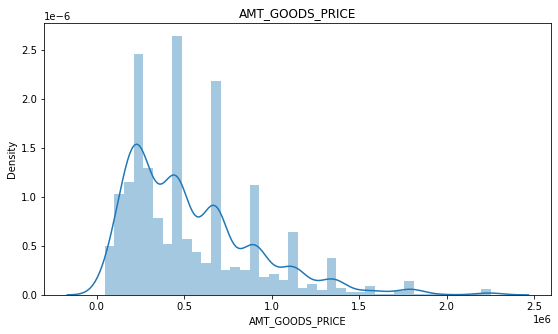

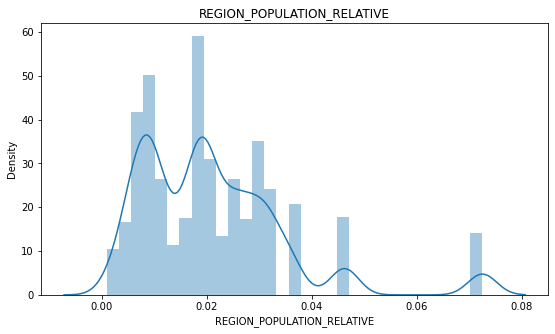

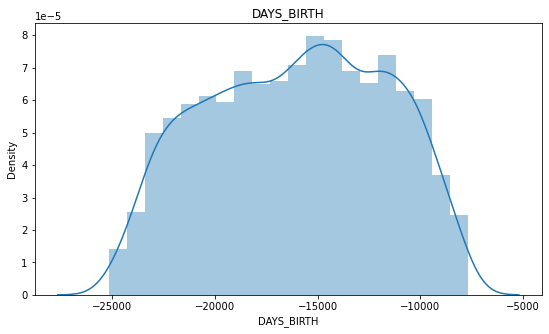

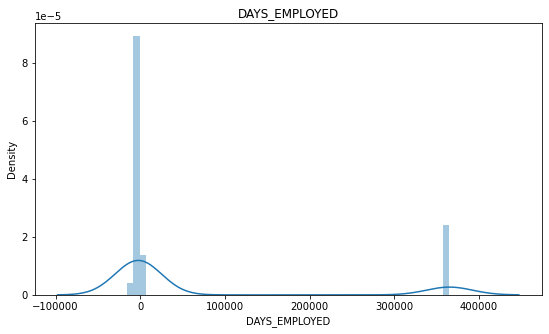

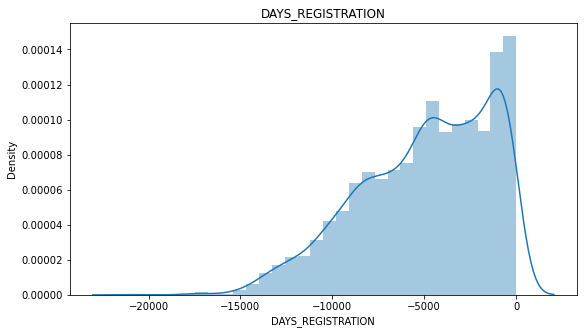

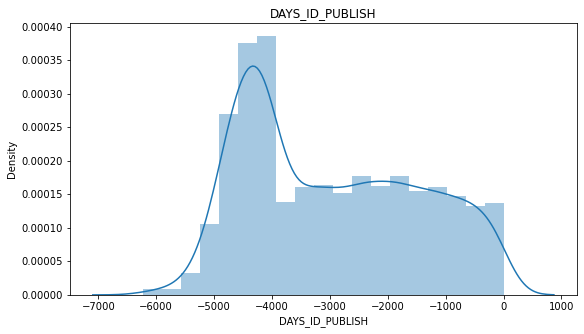

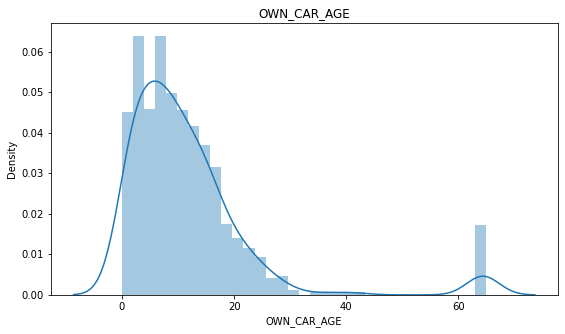

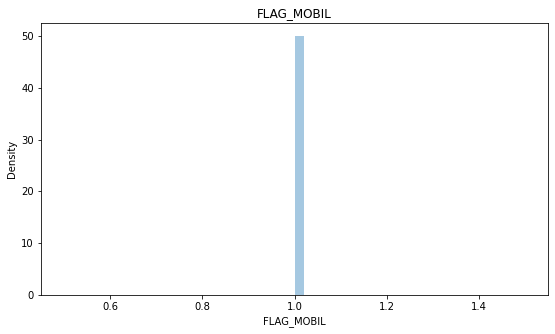

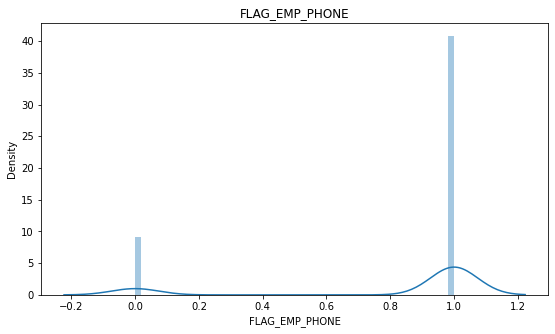

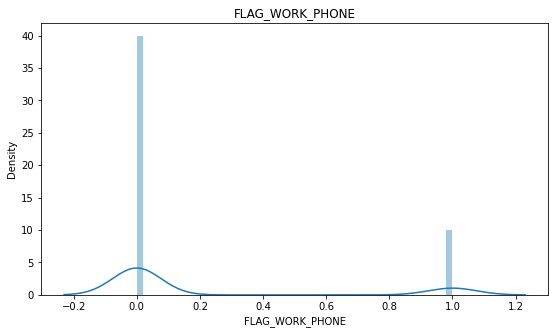

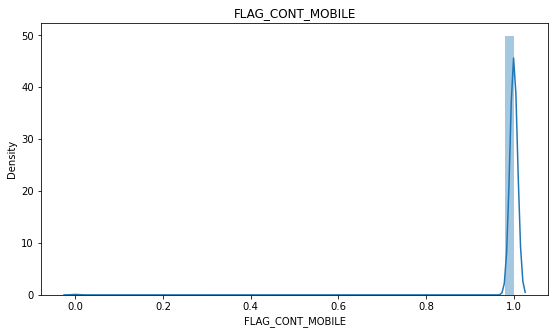

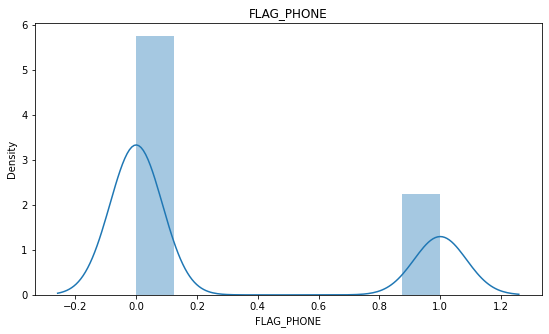

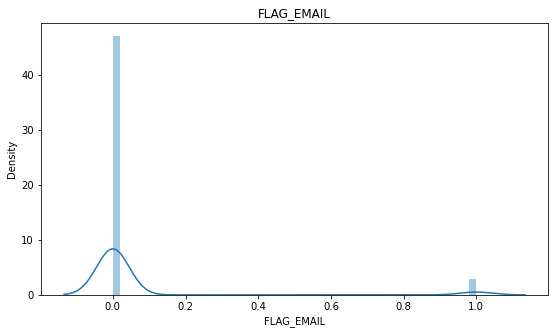

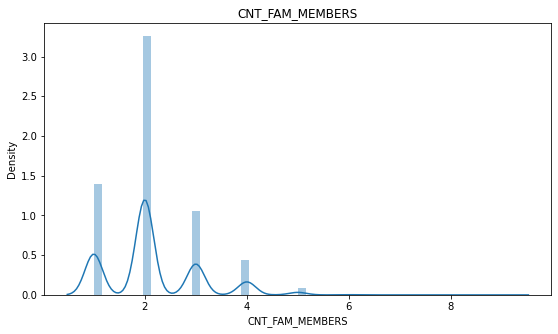

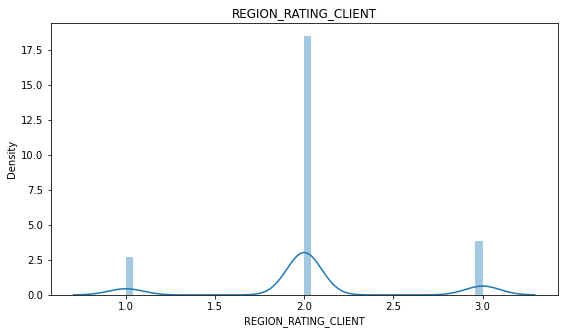

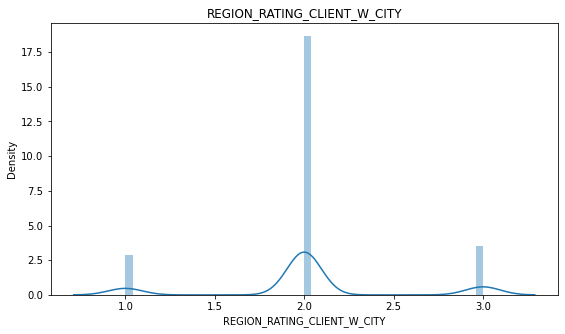

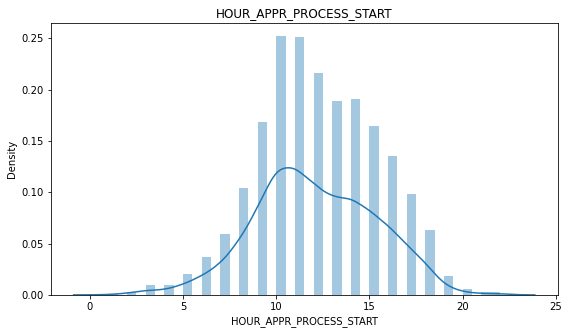

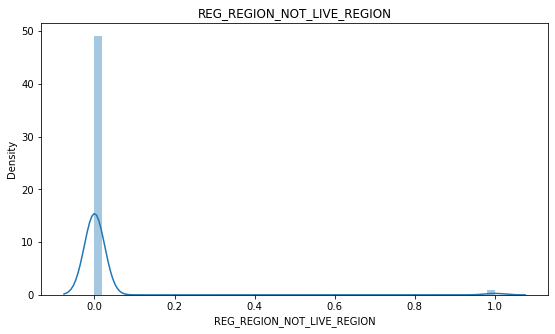

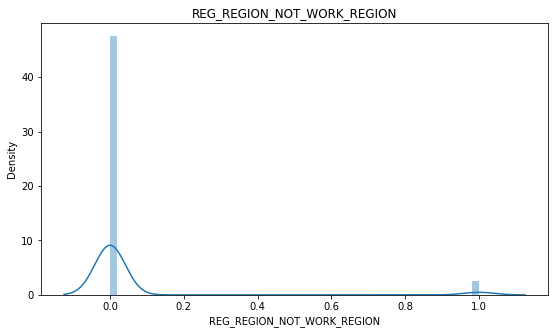

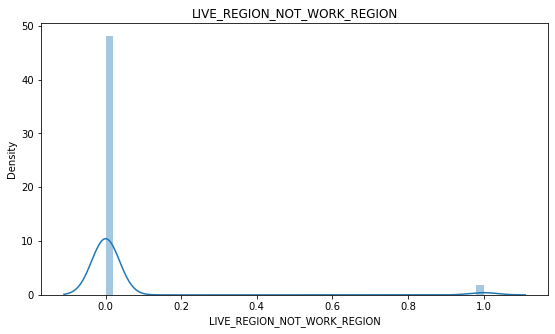

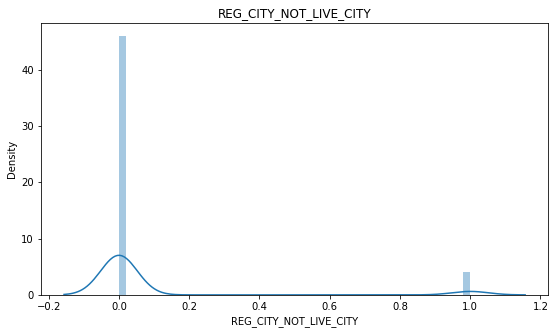

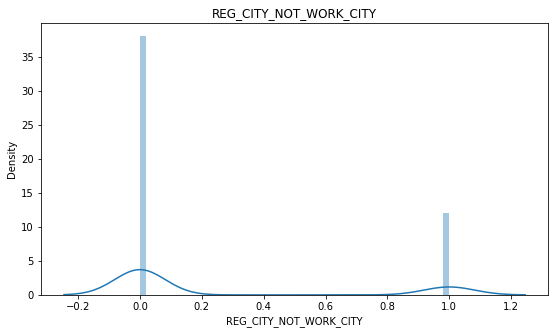

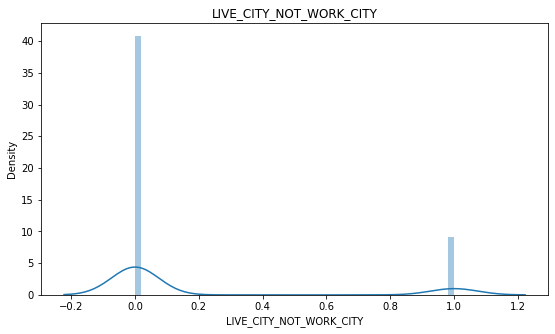

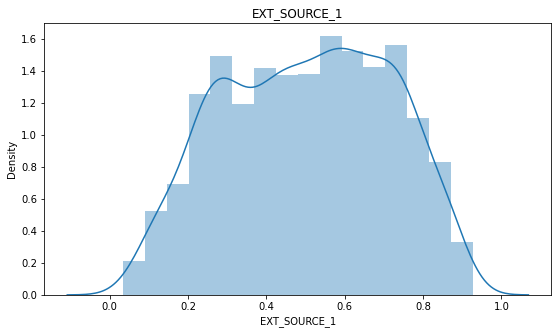

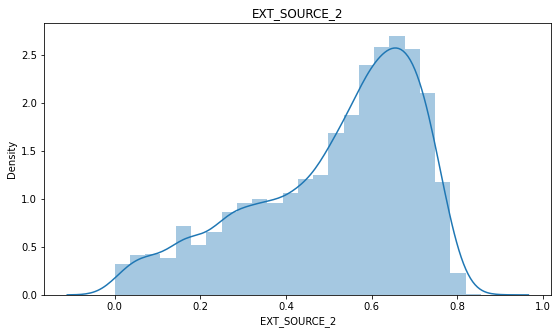

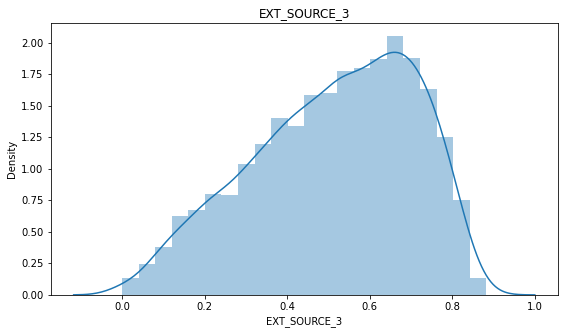

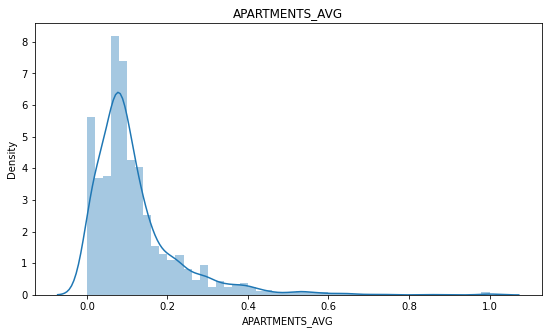

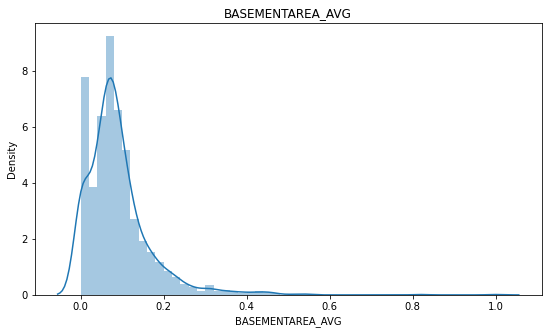

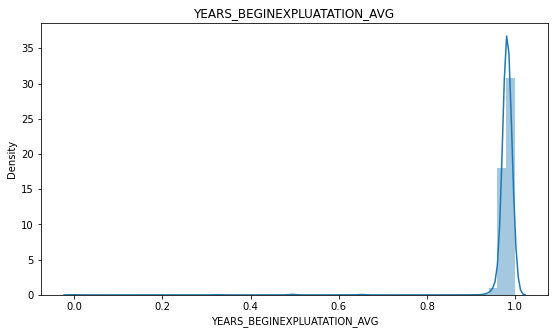

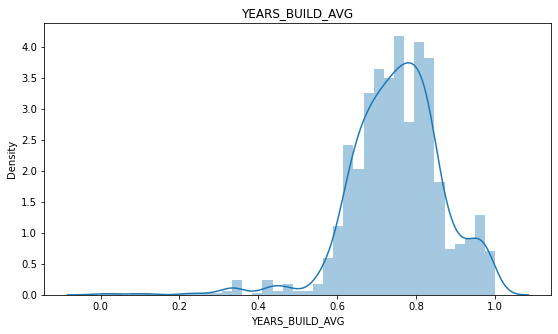

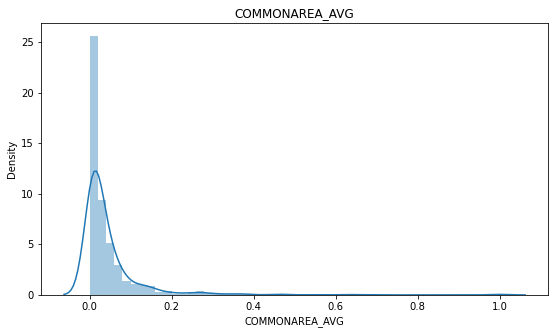

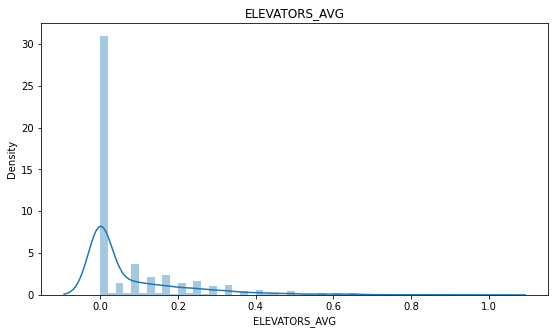

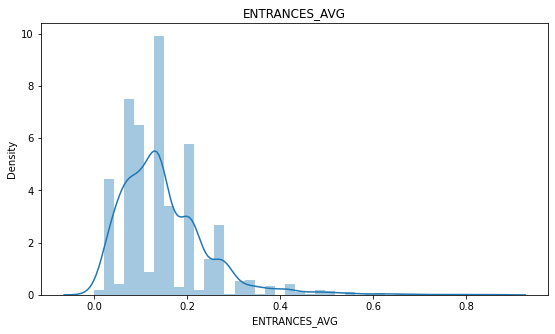

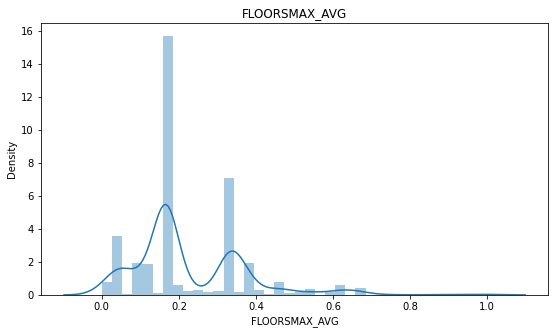

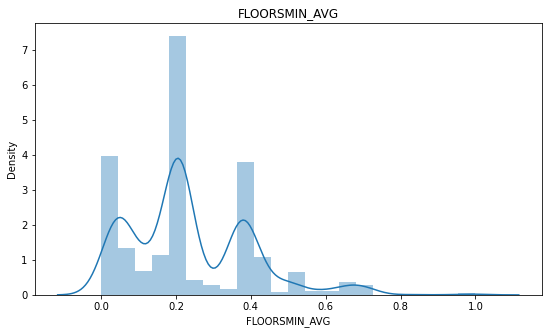

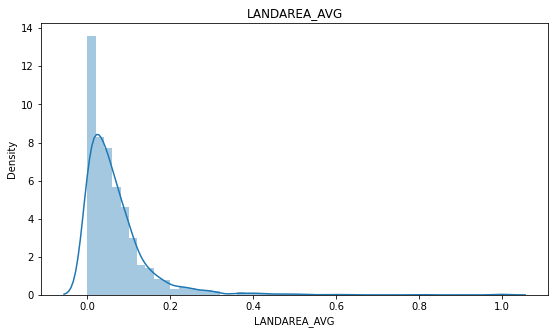

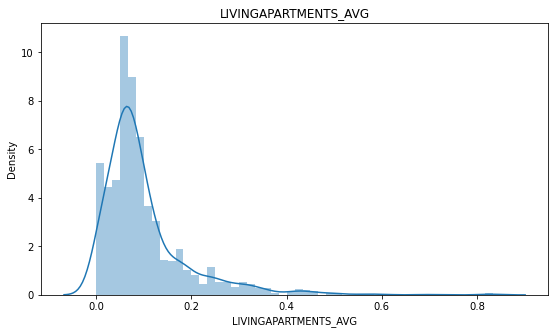

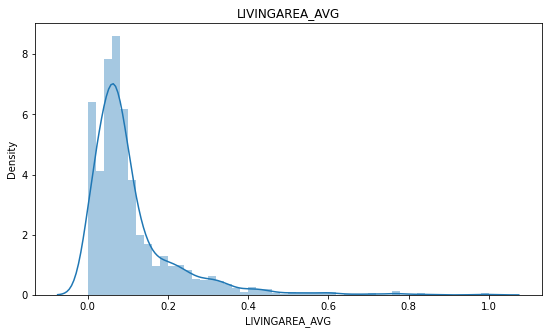

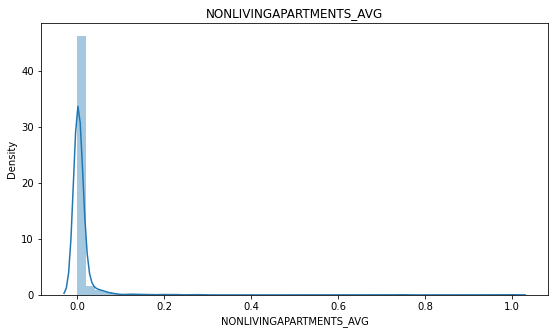

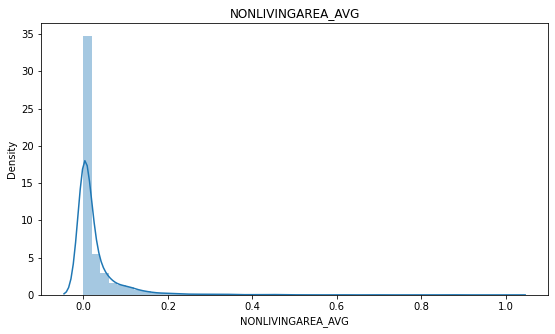

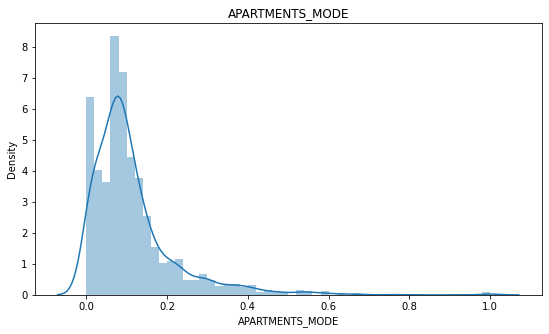

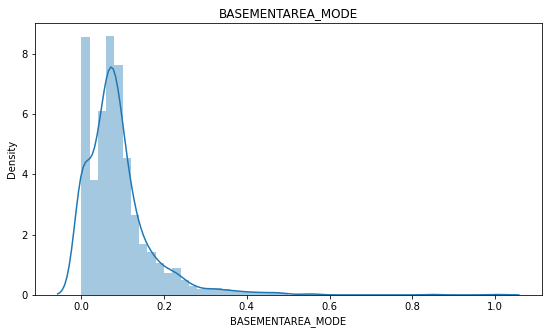

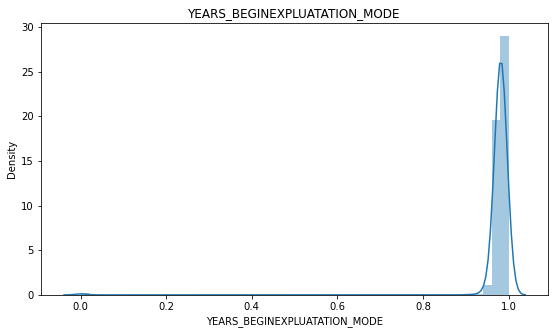

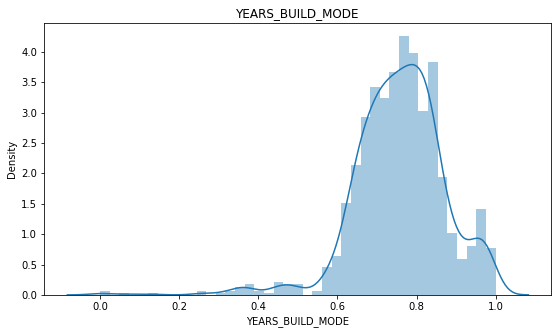

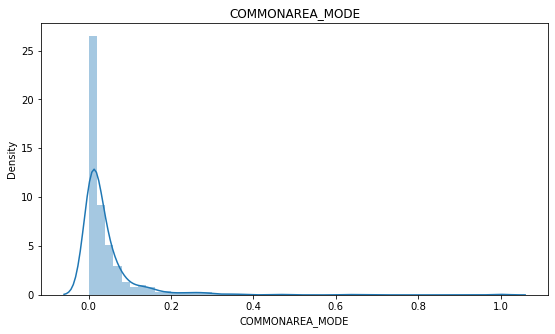

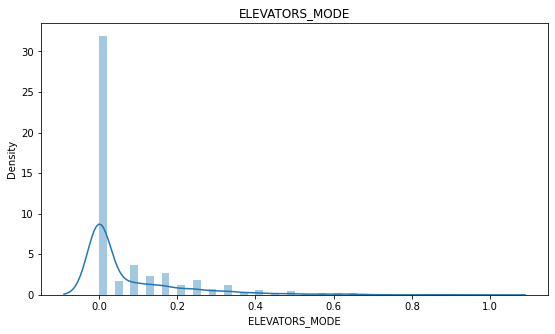

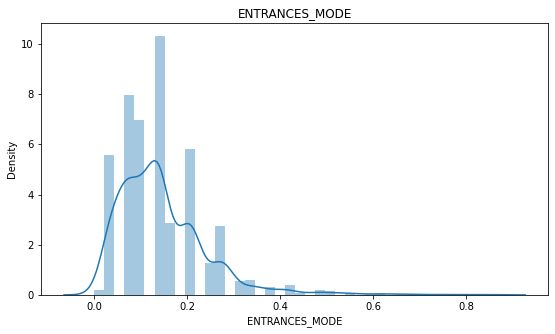

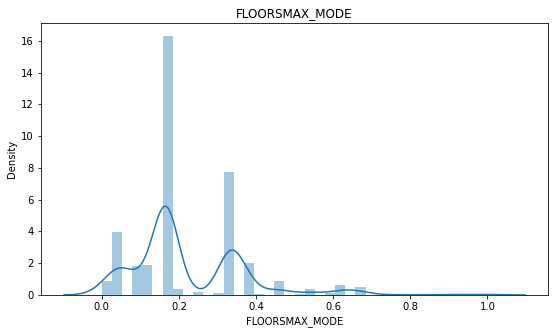

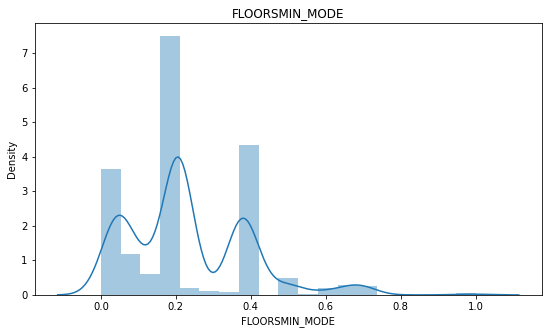

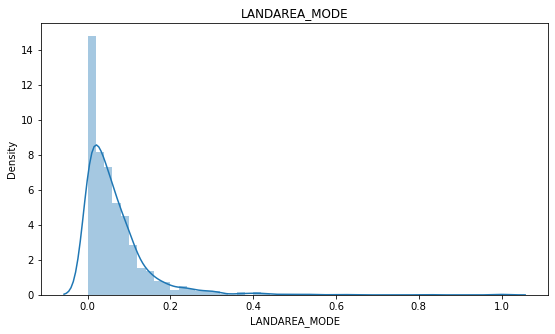

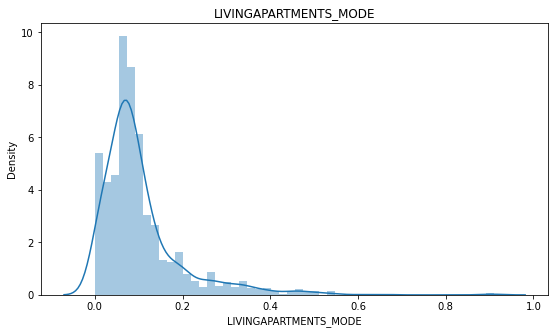

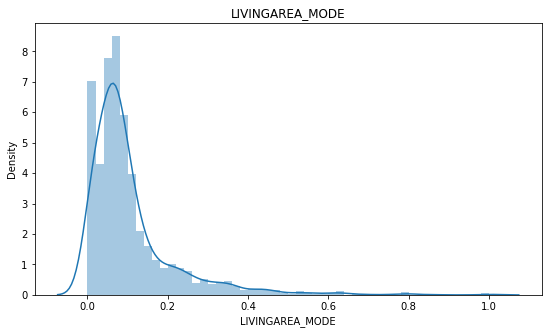

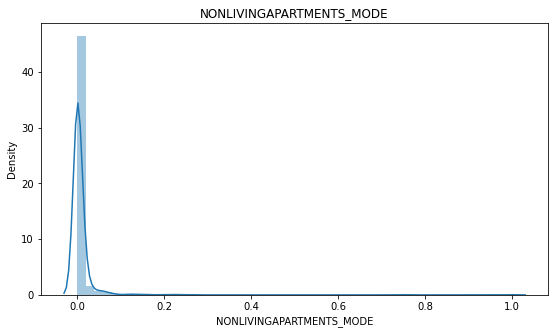

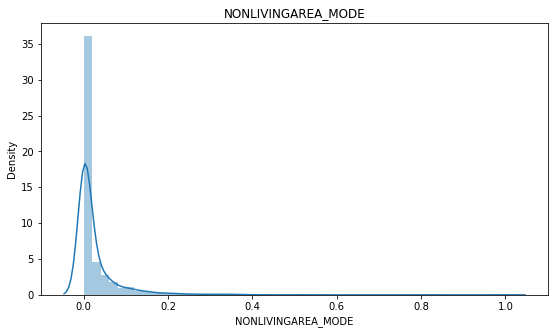

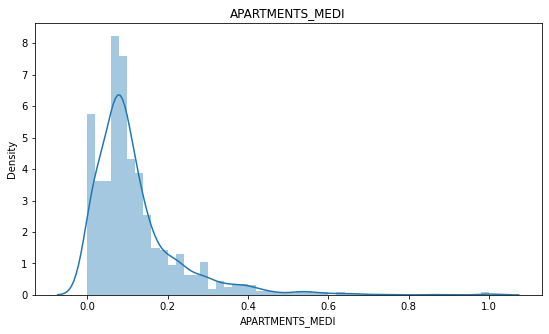

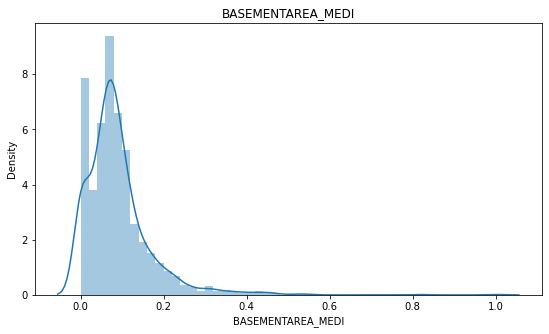

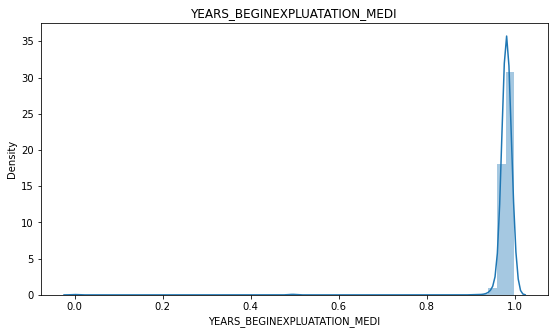

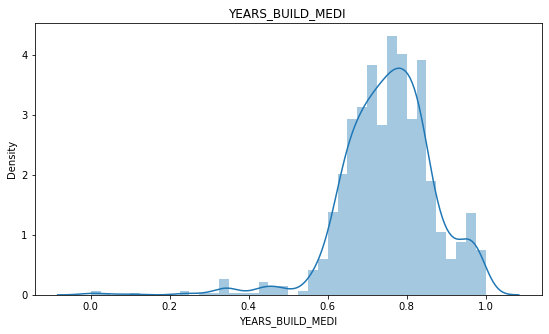

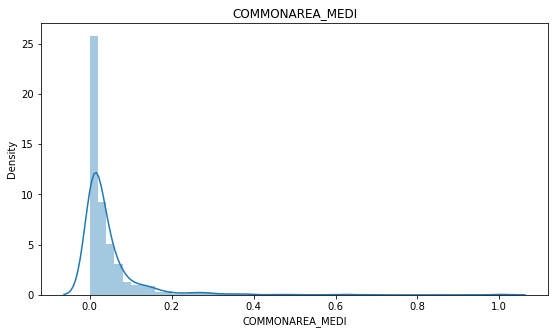

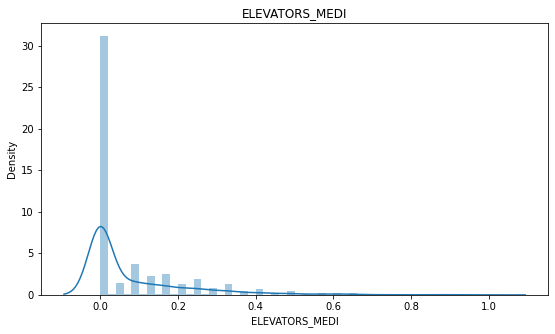

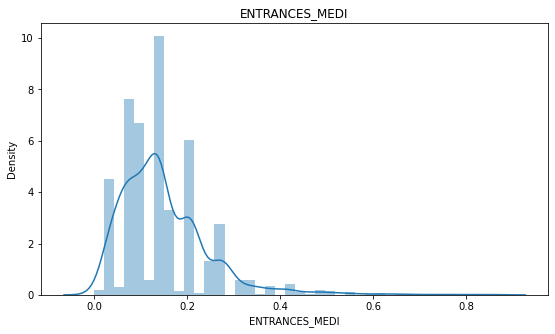

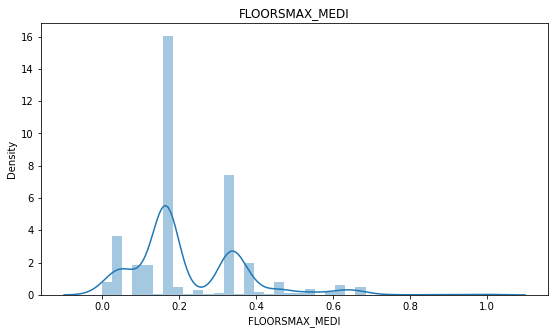

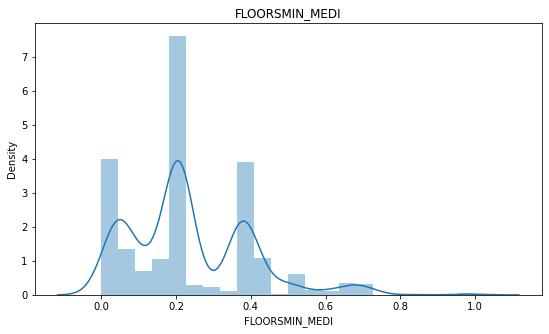

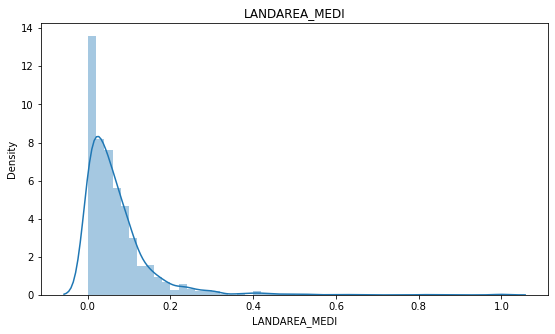

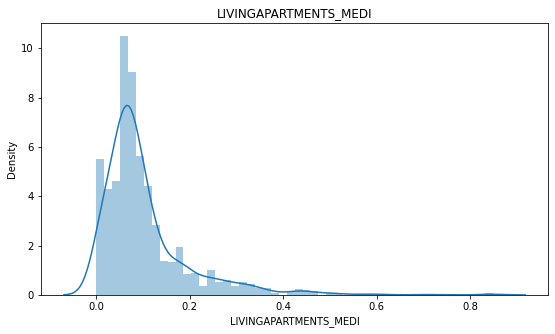

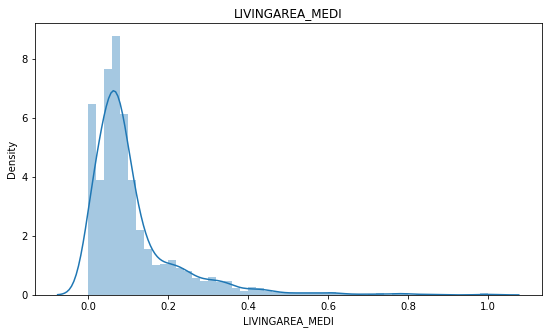

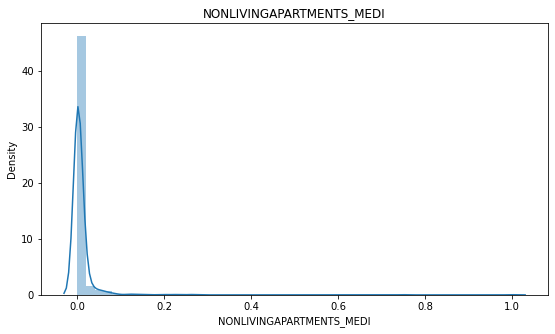

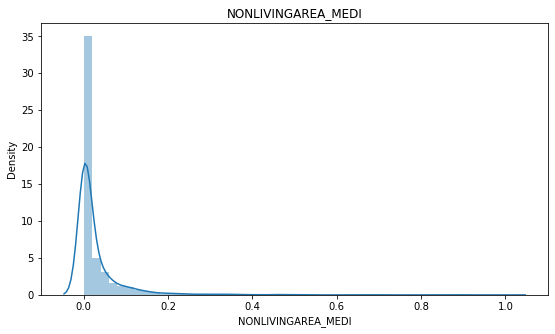

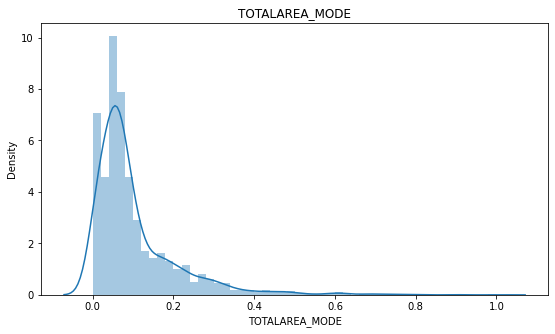

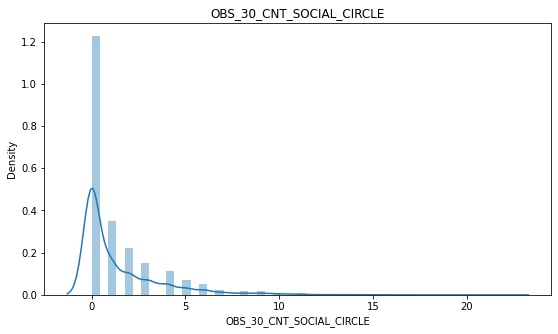

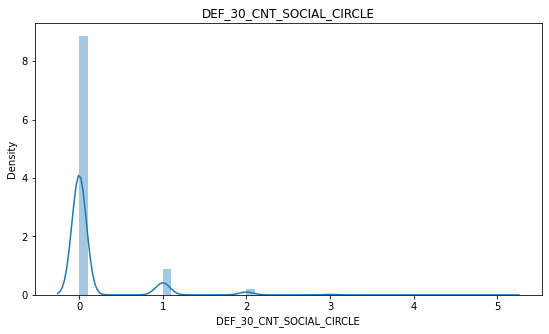

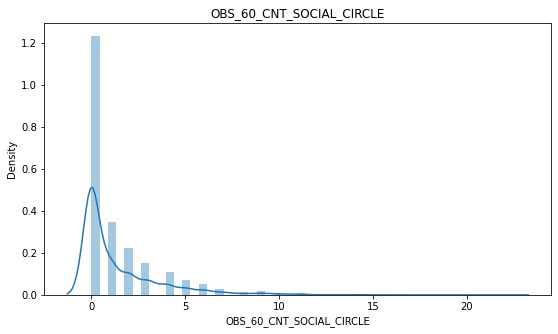

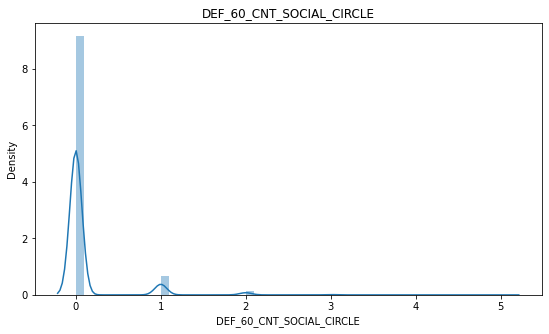

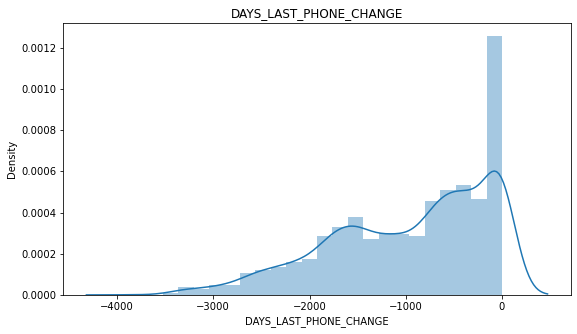

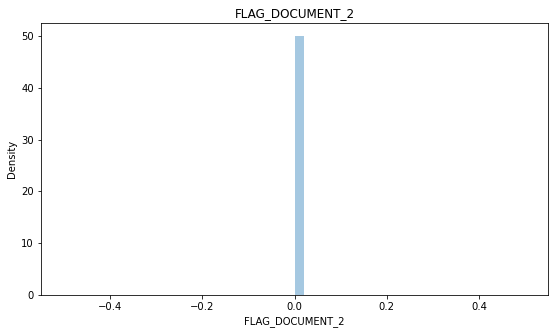

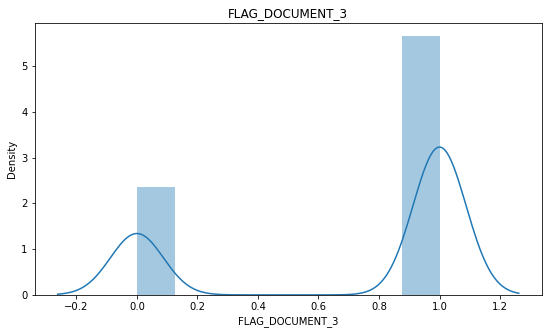

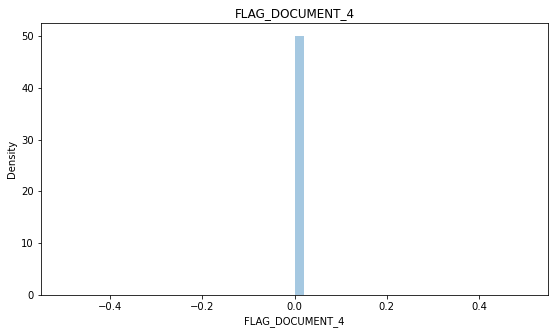

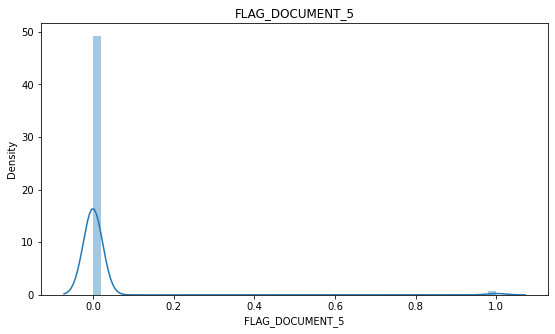

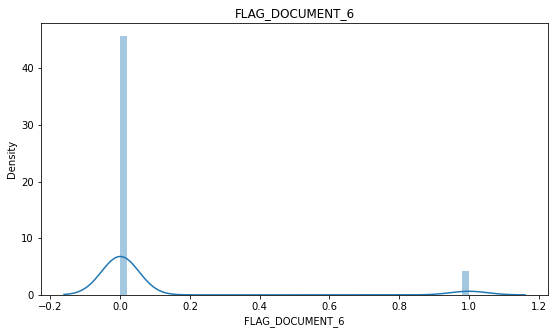

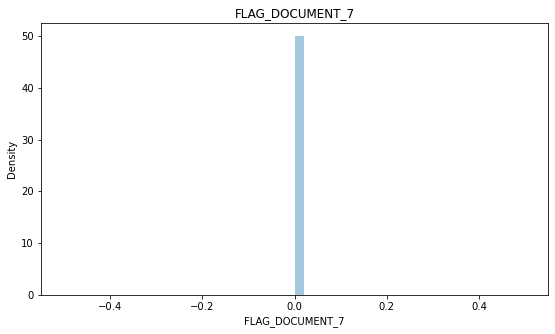

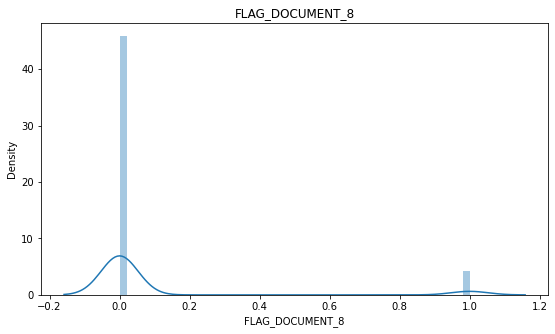

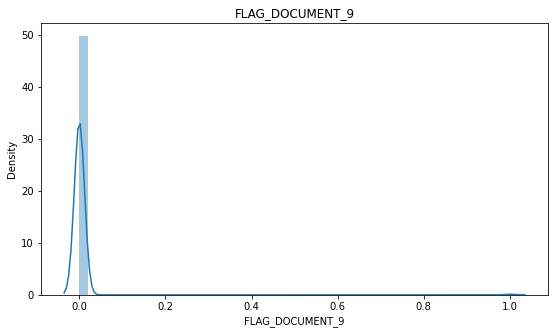

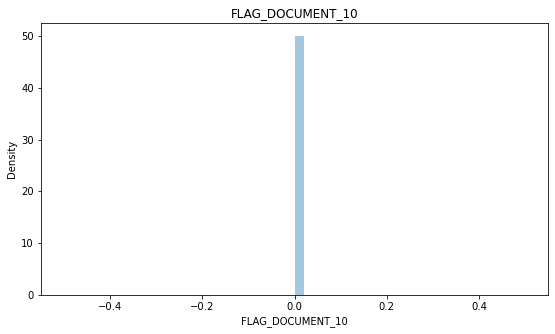

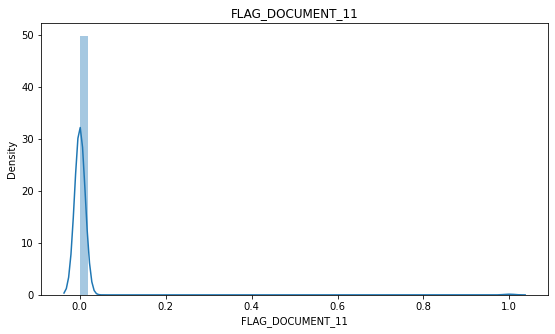

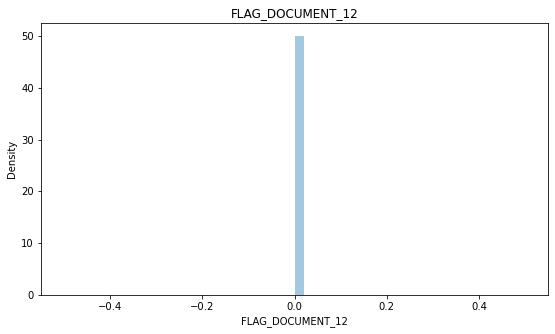

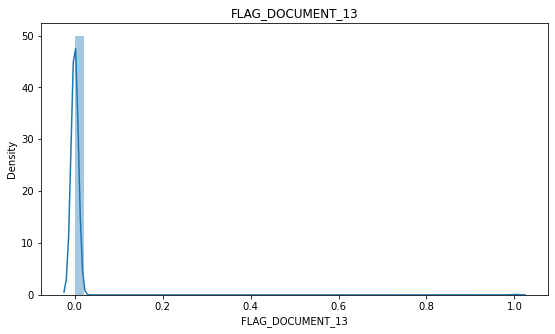

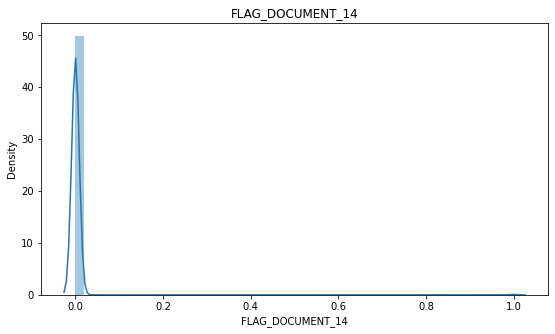

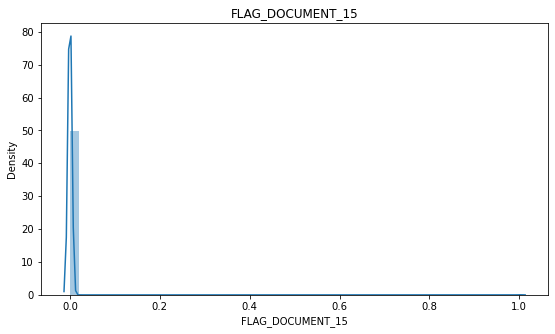

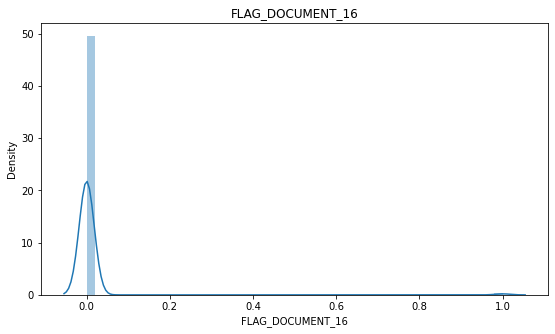

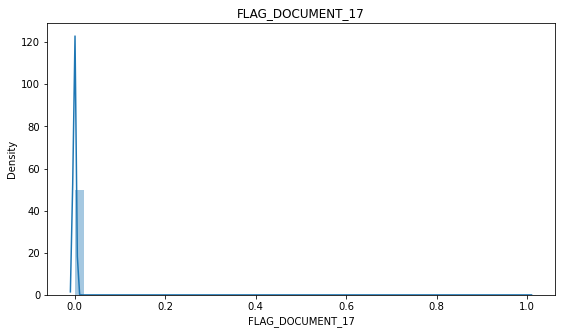

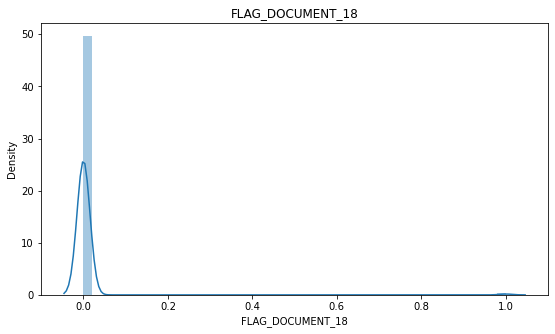

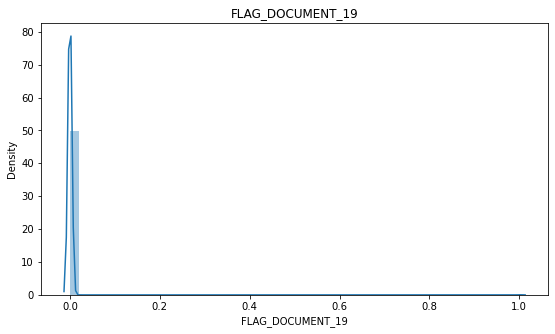

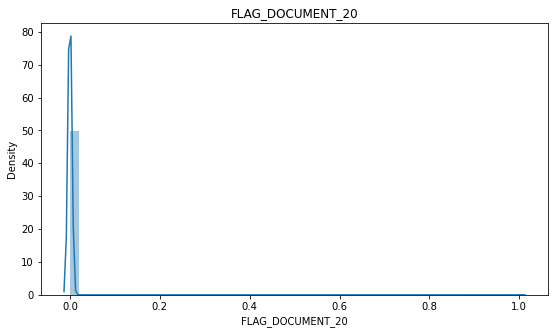

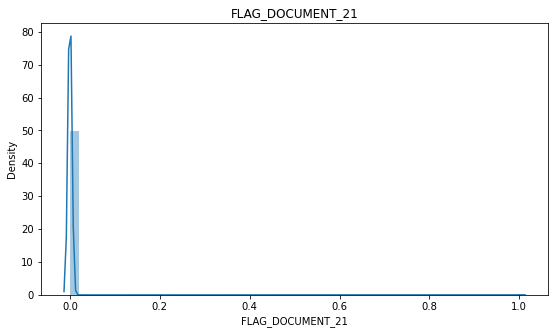

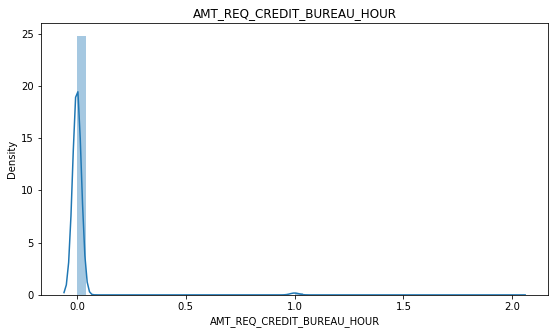

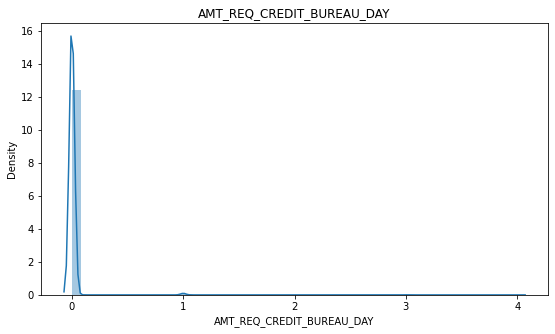

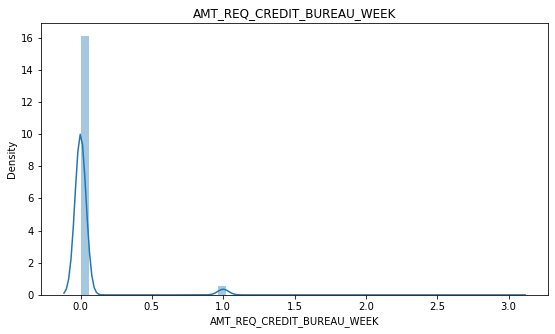

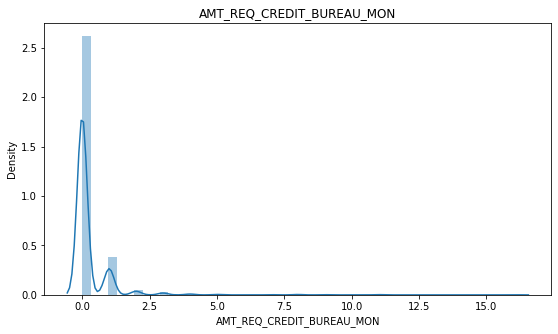

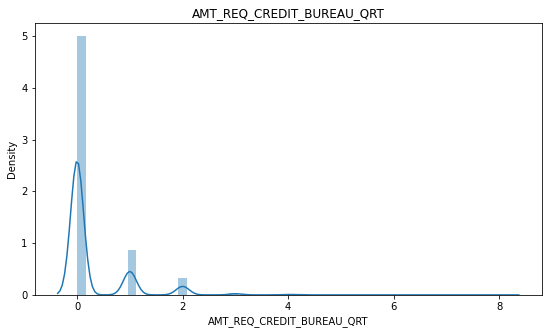

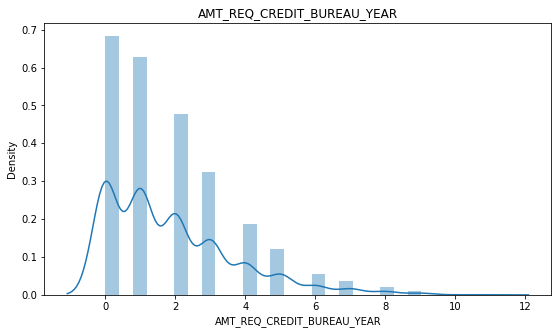

In [9]:
for column in numerical_df.columns:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)
    # save figure

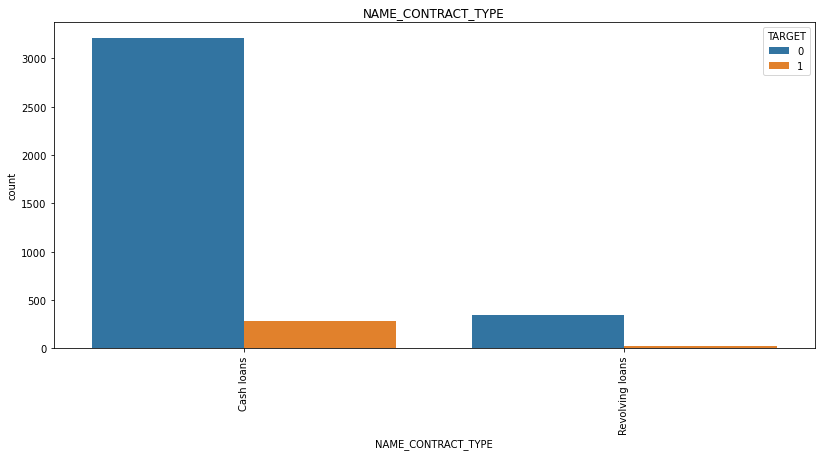

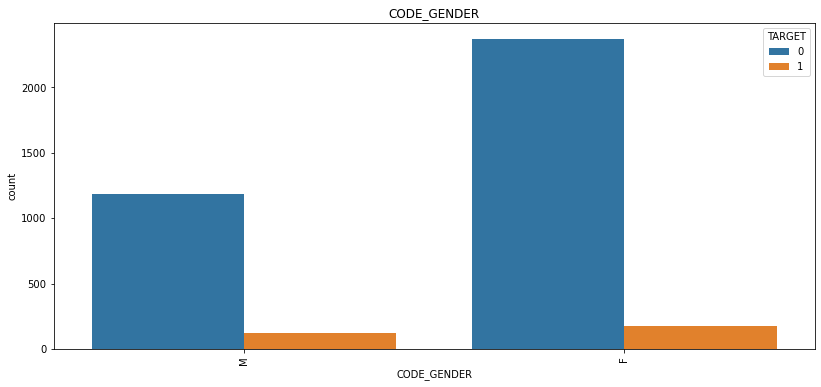

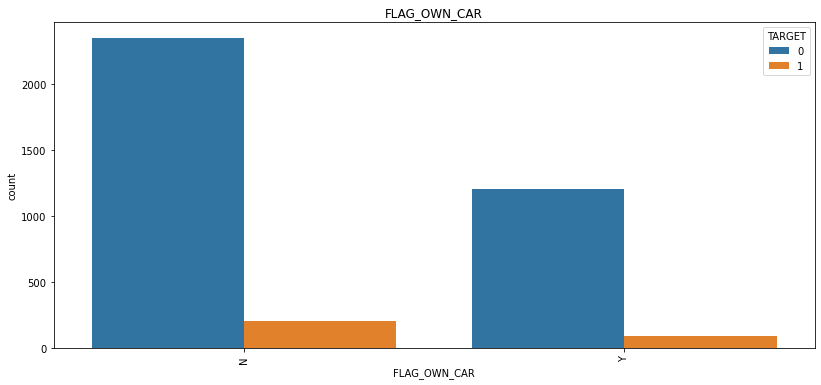

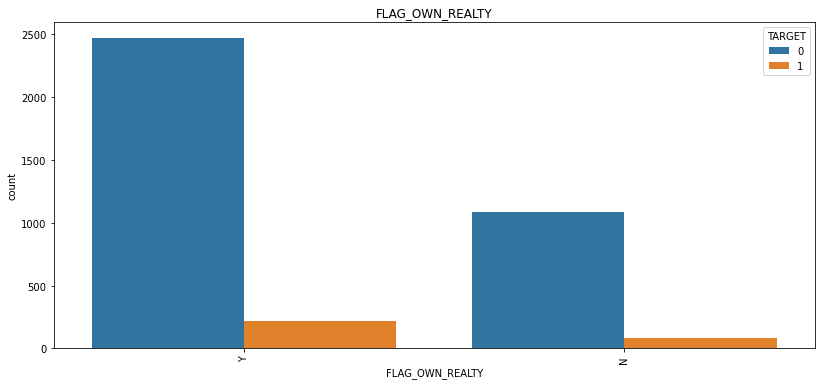

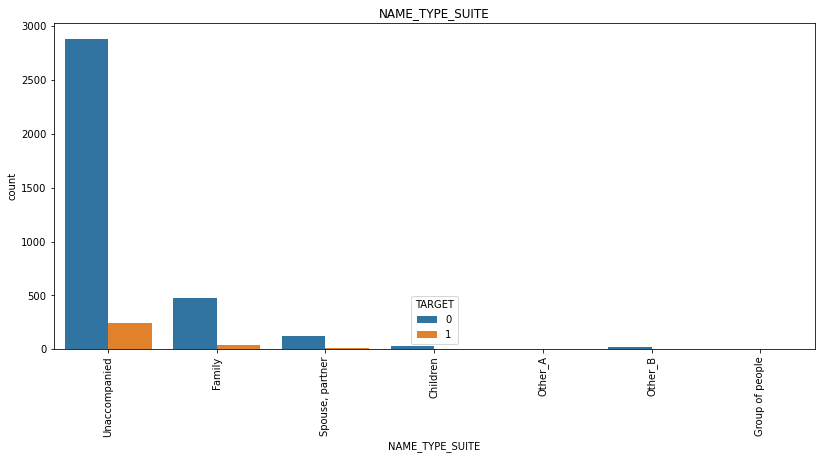

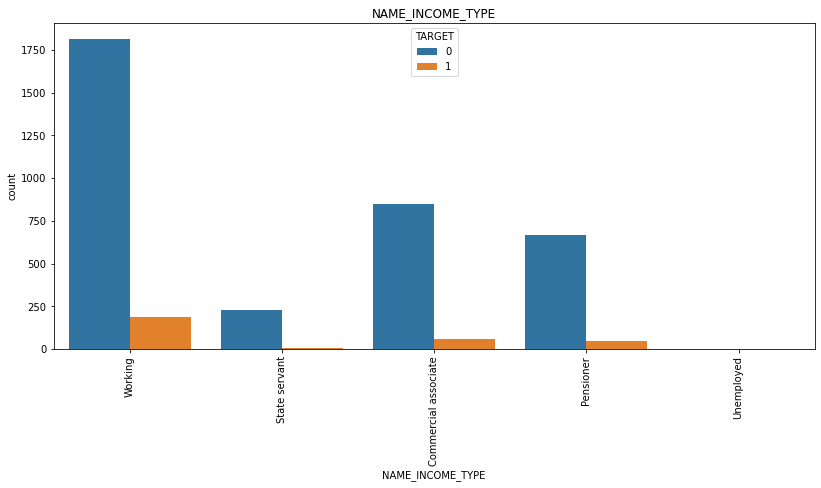

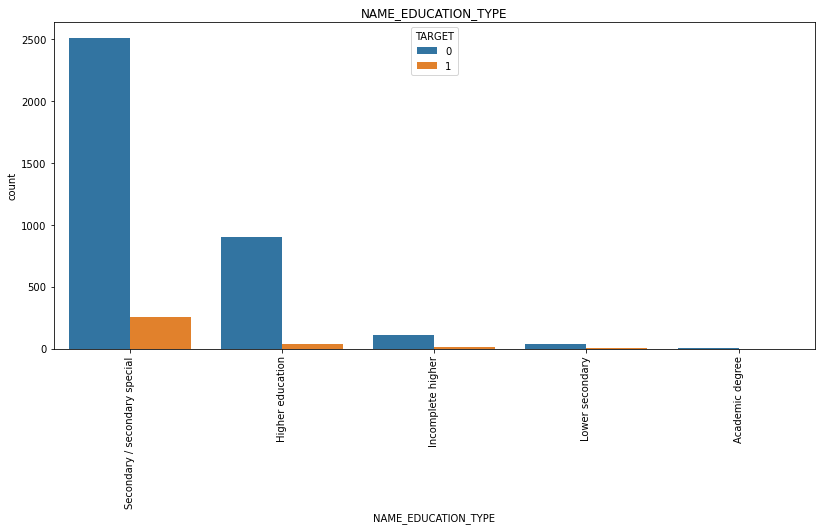

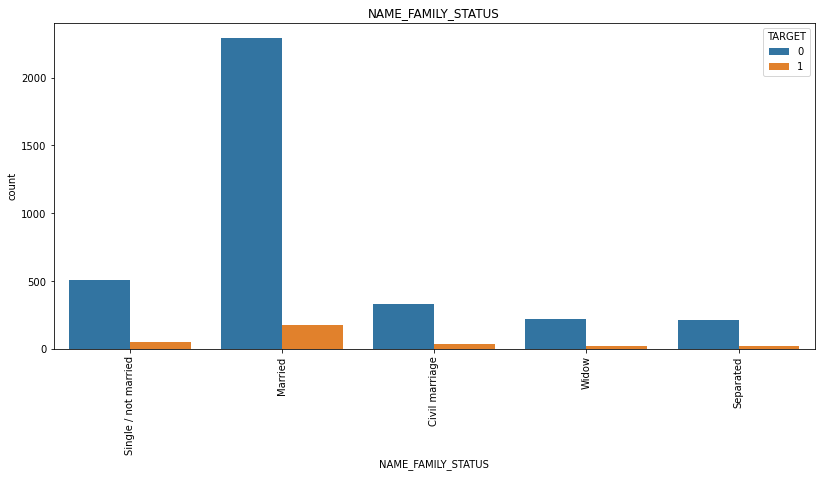

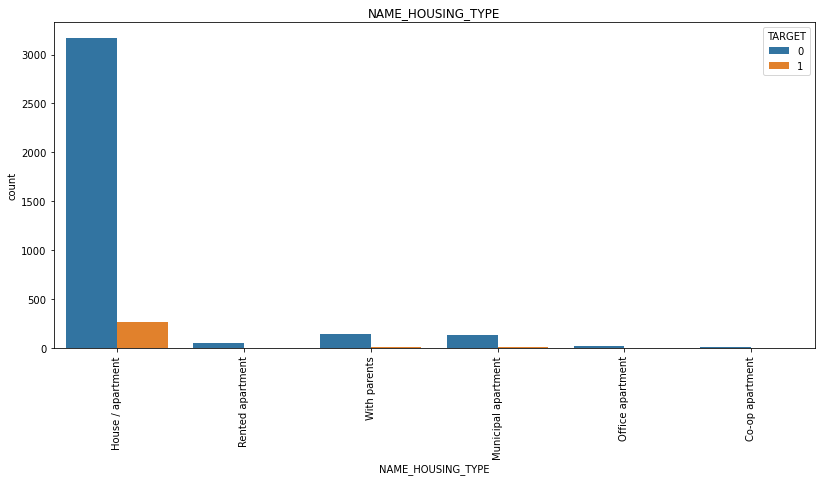

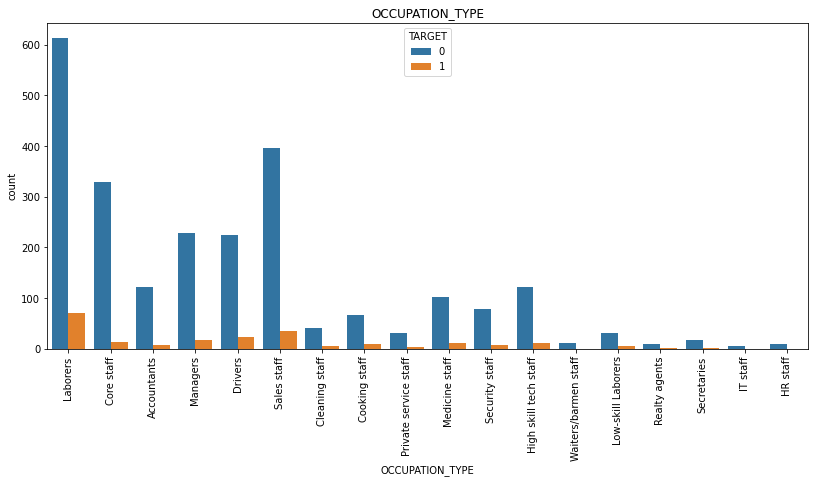

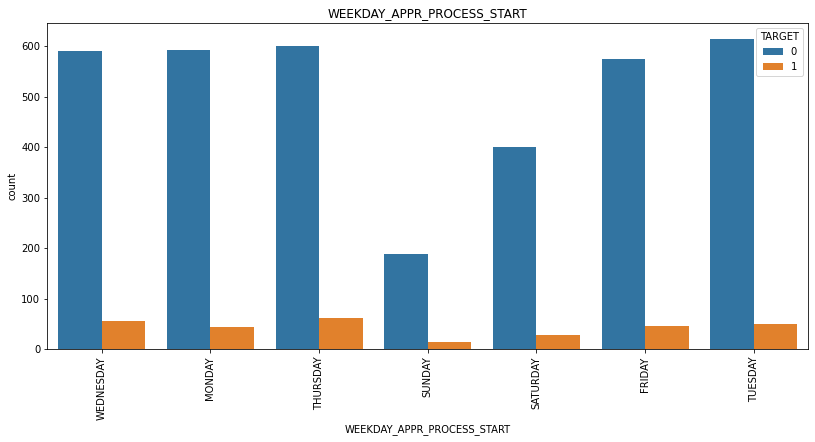

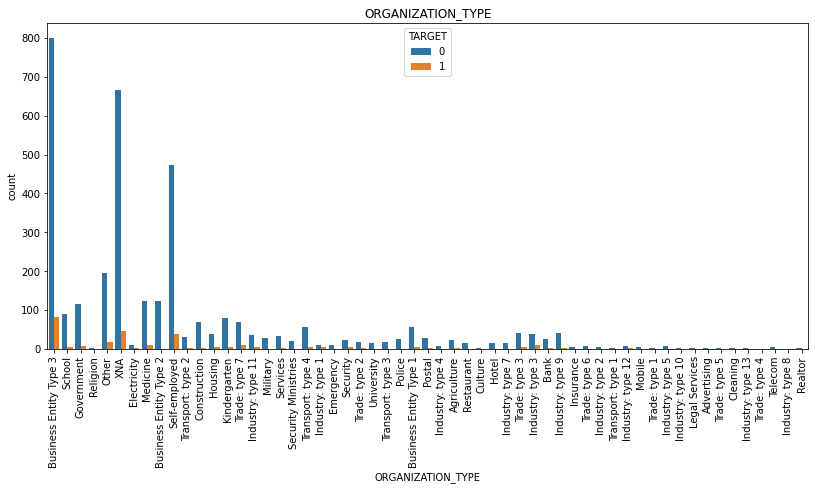

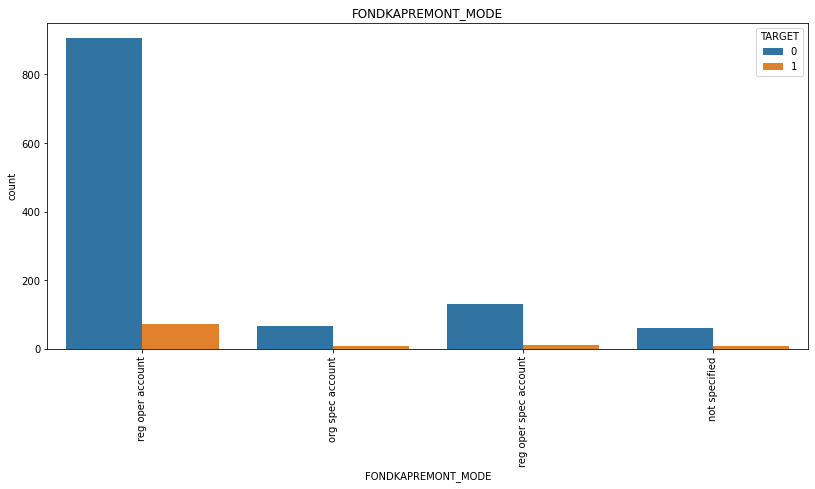

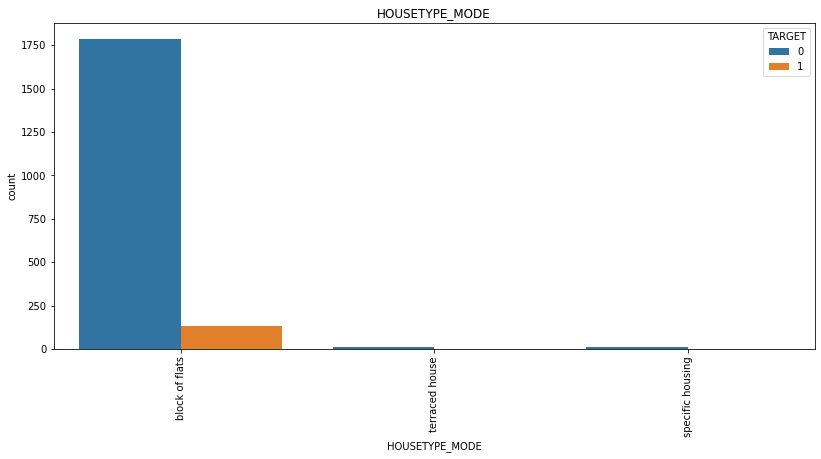

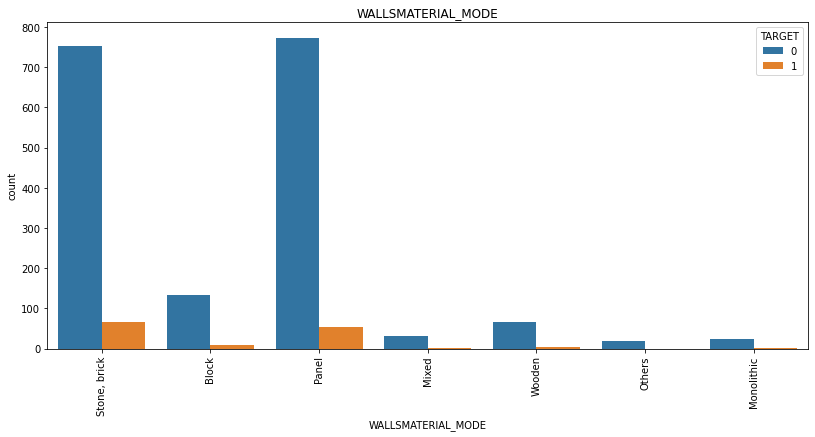

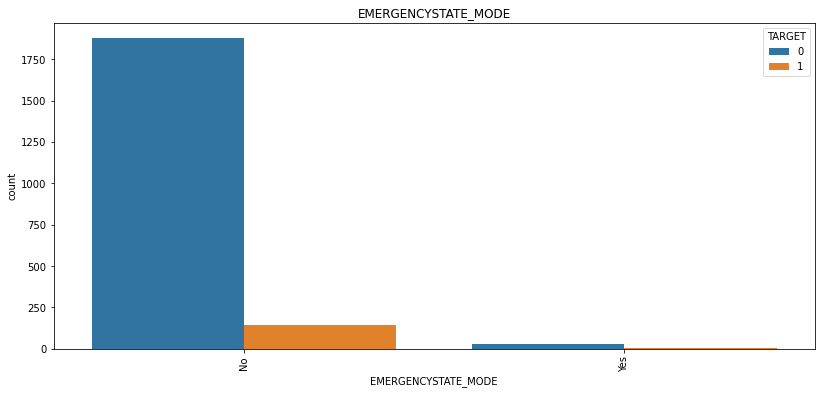

In [11]:
for column in categorical_df.columns:
    plt.figure(figsize=(30,6))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['TARGET'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    # save figures

In [12]:
# Observations